<a href="https://colab.research.google.com/github/charliewahl/TaxiDataNY-Analysis/blob/main/SDM_%C3%9C2_solution_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principles of Spatial Date Mining and Machine WS2022/2023 
# Lectuer team: Martin Werner, Hao Li

## Regression Excercise Part 2

In this exercise, we will try to implement logistic regression with the breast cancer Wisconsin (diagnostic) dataset, which is about the relationship between ten real-valued feature of a breast mass and cancer diagnostic results (yes or no):

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

First, we would load the datasets together, do some basic data exploration, and split the entire datasets into train and test. 

Then, there is one major task for you in this excercise:

- Build the logistic regression model between different varaible and the binary diagnostic results; 
- Apply the trained model in test dataset, and visualize the logistic regression probabilities;
- Calculate the confusion matrix and accuracy in the test dataset.


## Example Code:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# load the dataset
cancer_data = pd.read_csv('breast_cancer_wisconsin.csv')

# Print out the data
print(cancer_data)

     Unnamed: 0        id  diagnosis  radius_mean  texture_mean  \
0             0    842302          1        17.99         10.38   
1             1    842517          1        20.57         17.77   
2             2  84300903          1        19.69         21.25   
3             3  84348301          1        11.42         20.38   
4             4  84358402          1        20.29         14.34   
..          ...       ...        ...          ...           ...   
564         564    926424          1        21.56         22.39   
565         565    926682          1        20.13         28.25   
566         566    926954          1        16.60         28.08   
567         567    927241          1        20.60         29.33   
568         568     92751          0         7.76         24.54   

     perimeter_mean  area_mean  smoothness_mean  compactness_mean  \
0            122.80     1001.0          0.11840           0.27760   
1            132.90     1326.0          0.08474          

In [ ]:
# Define a set of independent variables and the targe binary label

x = cancer_data[['radius_mean', 'texture_mean']]
y = cancer_data['diagnosis']

In [ ]:
# Split the boston hoursing dataset into training and testing 

ratio = 0.2 # split ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=ratio,random_state=5)

# Print the size of train and test dataset

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 2)
(455,)
(114, 2)
(114,)


## Now, it is your turn!

### Task No.1: build the logstic regression model and calculate the confusion matrix and classification accuracy

In [ ]:
# Build a logistic regression model
logistic_regression= LogisticRegression()

### Q1.1: fit the model with the train data

In [ ]:
# tipcs: now you have a LR model, just fit it with your training feature and labels
logistic_regression.fit(x_train,y_train)

C:\Users\haoli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Q1.2: make the predication

In [ ]:
# tips: use the lR model with .predict function on testing dataset
y_pred=logistic_regression.predict(x_test)

### Q1.2: visualize the predication

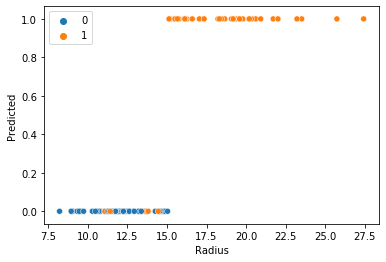

In [ ]:
# tips: visualize the binary diagnostic prediction w.r.t the 'radium_mean' feature
y_pred = y_pred.squeeze()
x_test_view = x_test['radius_mean'].values.squeeze()
sn.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()

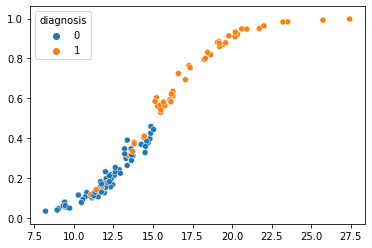

In [ ]:
# tips: now use the LR model with .predict_proba function to caluclcate the probabilities of the binary diagnostic prediction
y_prob = logistic_regression.predict_proba(x_test)
sn.scatterplot(x = x_test_view, y = y_prob[:,1], hue = y_test)

### Q1.3: calulate the confusion matrix based on crosstab from pandas and print

In [ ]:
# tips: add y_test and y_pred as argument to the pd.crosstab() function
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)


Predicted   0   1
Actual           
0          66   0
1          11  37


### Q1.4: visualize the confusion matrix using the heatmap() function in seaborn

Text(0.5, 15.0, 'Predicted label')

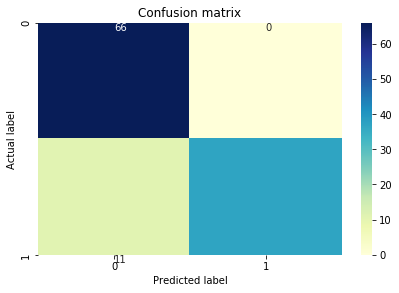

In [ ]:
akws = {"ha": 'left',"va": 'top'}
sn.heatmap(confusion_matrix, annot=True, annot_kws=akws, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Q1.5: calculate the accuracy, precision, recall using the prediction results and print the results

In [ ]:
# Tips:use the accuracy_score(),precision_score(),recall_score() functions in metrics, for example metrics.accuracy(XXXX,XXXX)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

Accuracy: 0.9035087719298246
Precision: 1.0
Recall: 0.7708333333333334


# Well Done! Now you manage the logistic regression! 